# DIAMOND Price Predicition based on quality 

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,roc_auc_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression,VarianceThreshold,SelectFromModel
import scipy.stats as st
import pylab
from xgboost import XGBClassifier


In [9]:
df=pd.read_csv('../dataset/diamonds.csv',index_col=0)
df=sklearn.utils.shuffle(df)

In [10]:
df.head(4)

,carat,cut,color,clarity,depth,table,price,x,y,z
21103,1.69,Premium,F,SI2,62.4,58.0,9275,7.65,7.57,4.75
48428,0.57,Ideal,G,VS1,61.4,55.0,1972,5.34,5.38,3.29
47512,0.54,Ideal,F,VS1,60.9,57.0,1866,5.26,5.21,3.19
7017,0.92,Good,D,SI1,63.1,58.0,4158,6.11,6.16,3.87


In [11]:
df.shape

(53940, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 21103 to 41237
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [13]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# EDA (Looking for missing data and handling categorical data)

In [14]:
df['Price']=df['price']

In [15]:
df.drop('price',inplace=True,axis=1)

In [16]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
Price      0
dtype: int64

In [17]:
df.clarity.unique()

array(['SI2', 'VS1', 'SI1', 'VS2', 'VVS2', 'IF', 'VVS1', 'I1'],
      dtype=object)

In [18]:
df.reset_index(inplace=True)

In [19]:
df.isnull().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
Price      0
dtype: int64

In [20]:
['VVS2', 'I1', 'VS2', 'VVS1', 'IF', 'SI2', 'VS1', 'SI1']

['VVS2', 'I1', 'VS2', 'VVS1', 'IF', 'SI2', 'VS1', 'SI1']

In [21]:
cut={'Fair':1,'Good':2,'Very Good':3,'Premium':4,'Ideal':5}
clarity={'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8,'FL':9}
color={'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}

In [22]:
df.isnull().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
Price      0
dtype: int64

In [23]:
df['cut']=df['cut'].map(cut)
df['clarity']=df['clarity'].map(clarity)
df['color']=df['color'].map(color)

In [24]:
df.isnull().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
Price      0
dtype: int64

In [25]:
df.drop('index',axis=1,inplace=True)

In [26]:
df.shape

(53940, 10)

In [27]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]

In [28]:
df.shape

(53920, 10)

# Visualization

In [29]:
df.corr()

,carat,cut,color,clarity,depth,table,x,y,z,Price
carat,1.000000,-0.134953,-0.291360,-0.352757,0.028259,0.181646,0.977779,0.953991,0.961048,0.921592
cut,-0.134953,1.000000,0.020517,0.189153,-0.218073,-0.433306,-0.126232,-0.122181,-0.150647,-0.053491
color,-0.291360,0.020517,1.000000,-0.025783,-0.047373,-0.026481,-0.270671,-0.263915,-0.270011,-0.172431
clarity,-0.352757,0.189153,-0.025783,1.000000,-0.067457,-0.160256,-0.372865,-0.359015,-0.370250,-0.146789
depth,0.028259,-0.218073,-0.047373,-0.067457,1.000000,-0.295733,-0.025017,-0.029069,0.095023,-0.010729
table,0.181646,-0.433306,-0.026481,-0.160256,-0.295733,1.000000,0.196097,0.184493,0.152483,0.127245
x,0.977779,-0.126232,-0.270671,-0.372865,-0.025017,0.196097,1.000000,0.974918,0.975435,0.887231
y,0.953991,-0.122181,-0.263915,-0.359015,-0.029069,0.184493,0.974918,1.000000,0.956744,0.867864
z,0.961048,-0.150647,-0.270011,-0.370250,0.095023,0.152483,0.975435,0.956744,1.000000,0.868206
Price,0.921592,-0.053491,-0.172431,-0.146789,-0.010729,0.127245,0.887231,0.867864,0.868206,1.000000


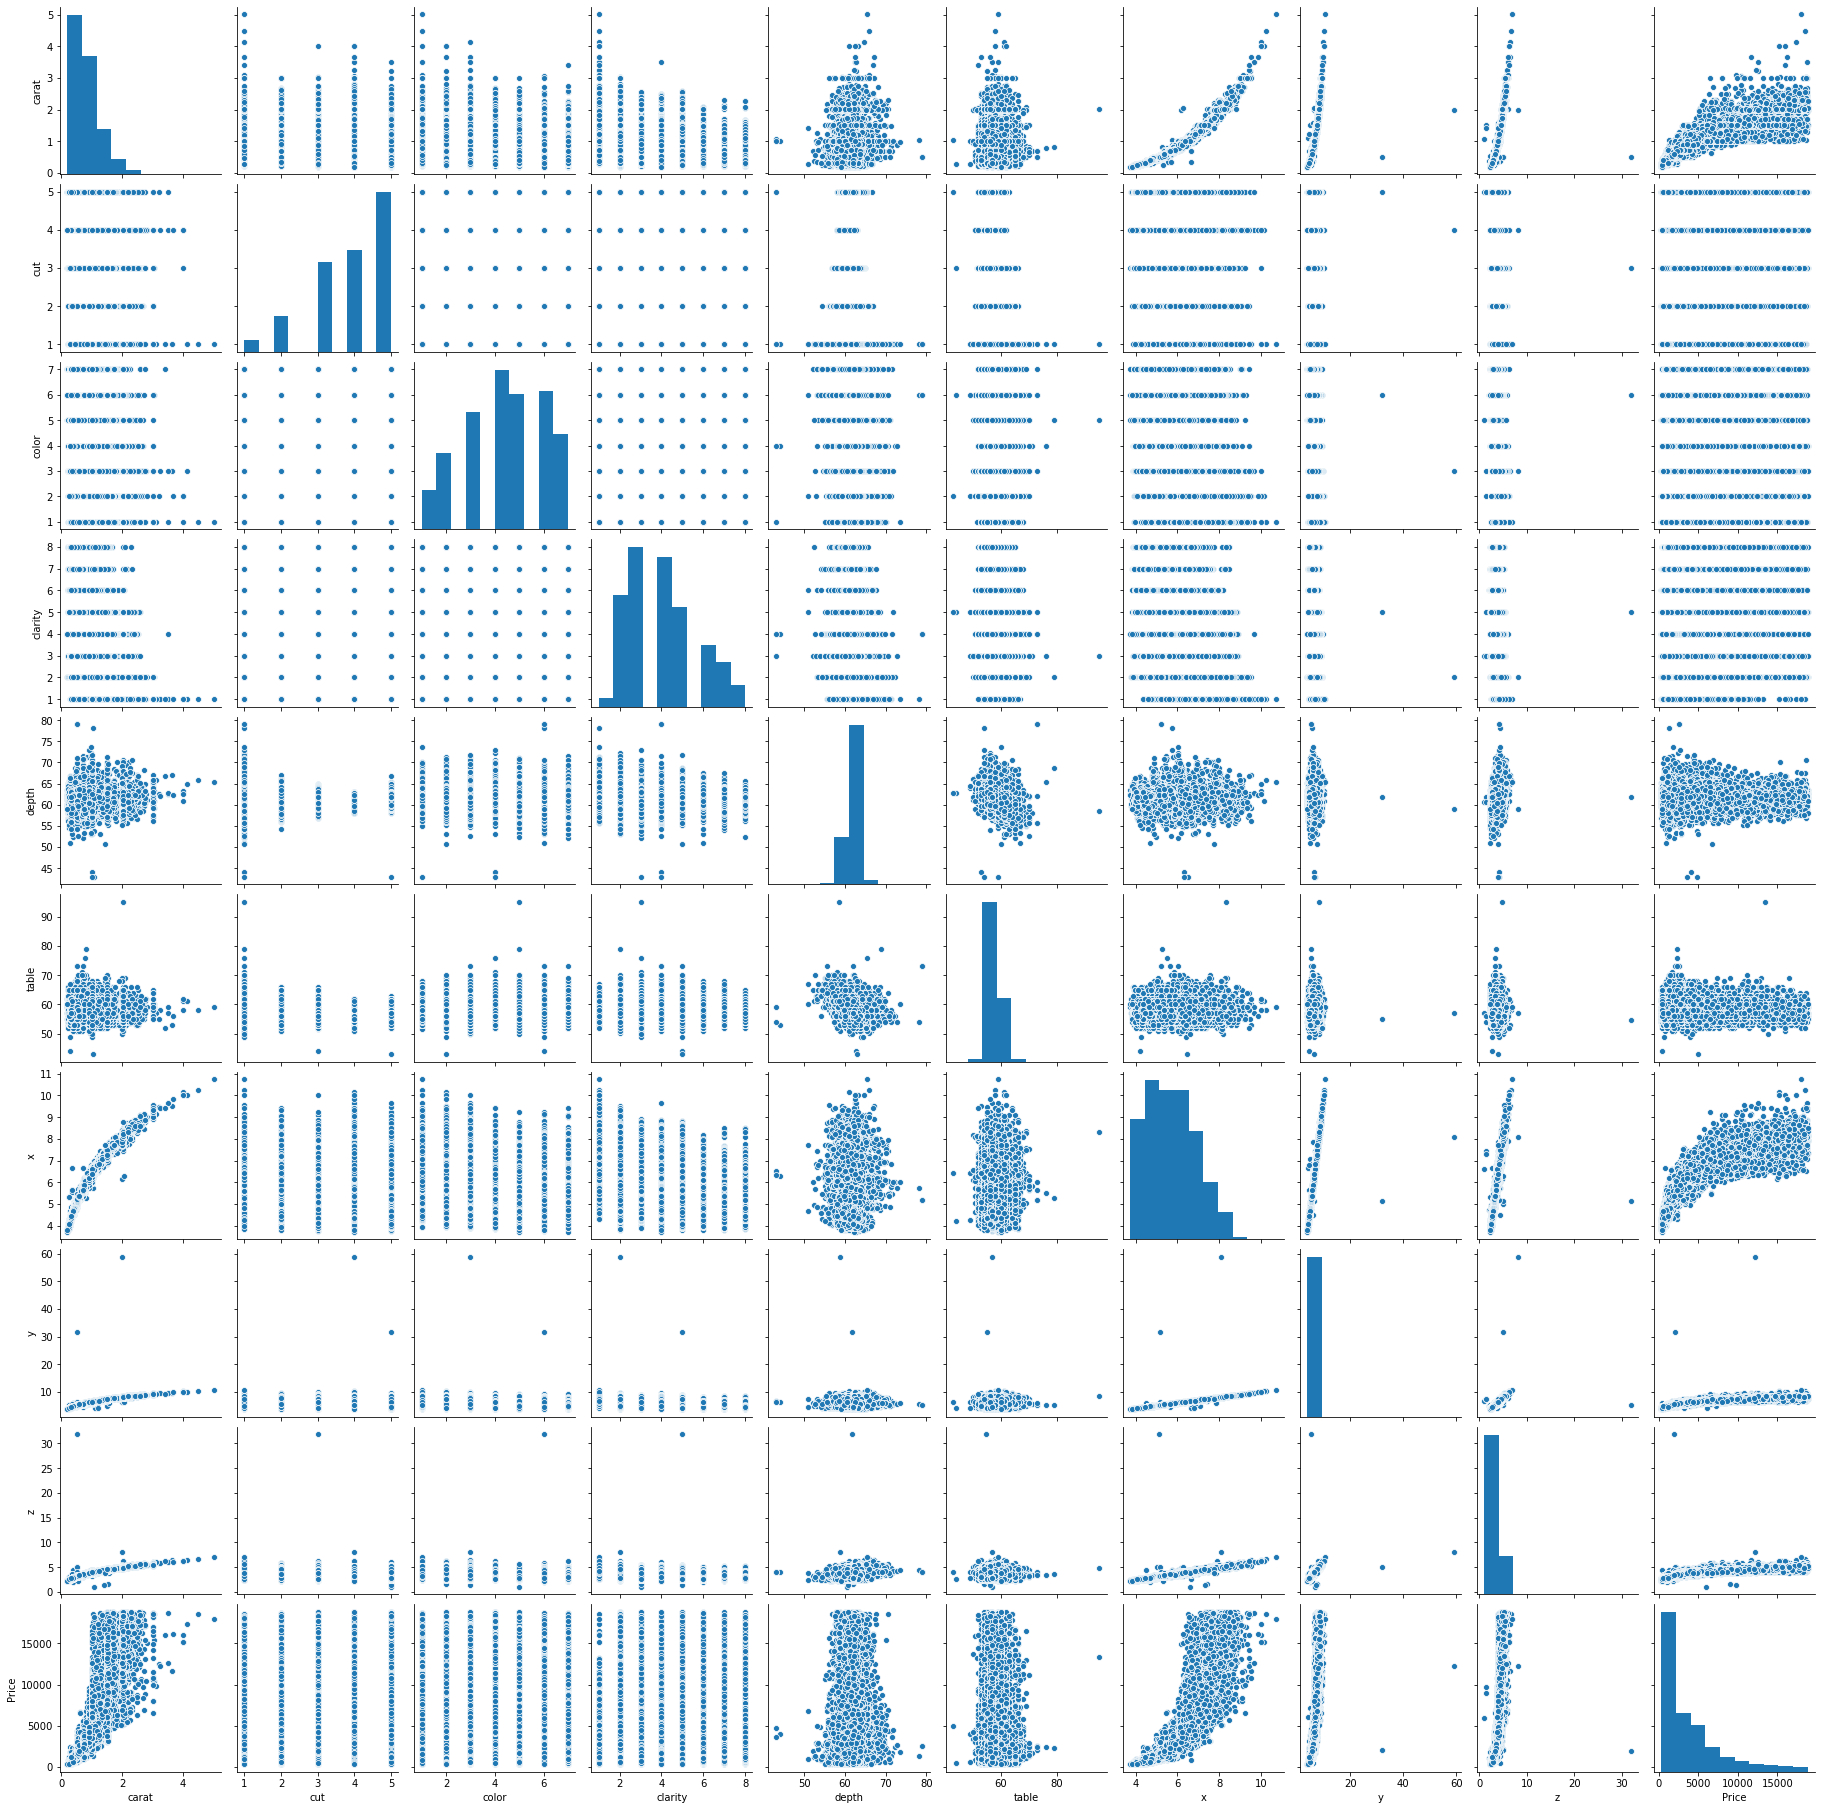

In [30]:
sns.pairplot(df)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

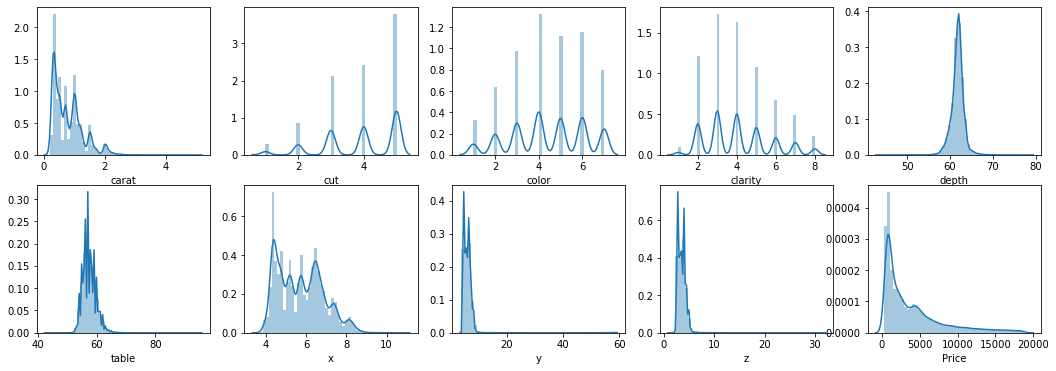

In [31]:
fig,ax=plt.subplots(2,5,figsize=(18,6))
index=0
for i in range(2):
    for j in range(5):
        sns.distplot(df[df.columns[index]],ax=ax[i][j])
        index=index+1
plt.tight_layout

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
sc=StandardScaler().fit(x_train)
x_train=pd.DataFrame(sc.transform(x_train))
x_test=sc.transform(x_test)

NameError: name 'x' is not defined

In [ ]:
fig,ax=plt.subplots(2,5,figsize=(18,6))
index=0
for i in range(2):
    for j in range(5):
        sns.boxplot(x_train[x_train.columns[index]],ax=ax[i][j],orient='vertical')
        index=index+1
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

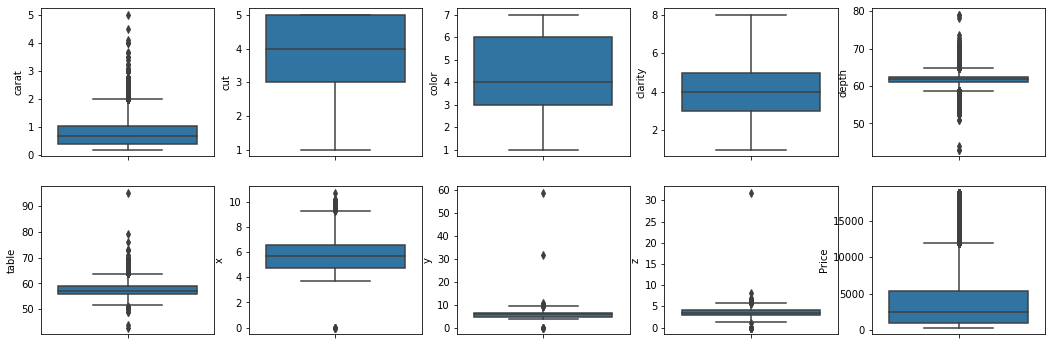

In [145]:
fig,ax=plt.subplots(2,5,figsize=(18,6))
index=0
for i in range(2):
    for j in range(5):
        sns.boxplot(df[df.columns[index]],ax=ax[i][j],orient='vertical')
        index=index+1
plt.tight_layout

In [123]:
cormat=df.corr()


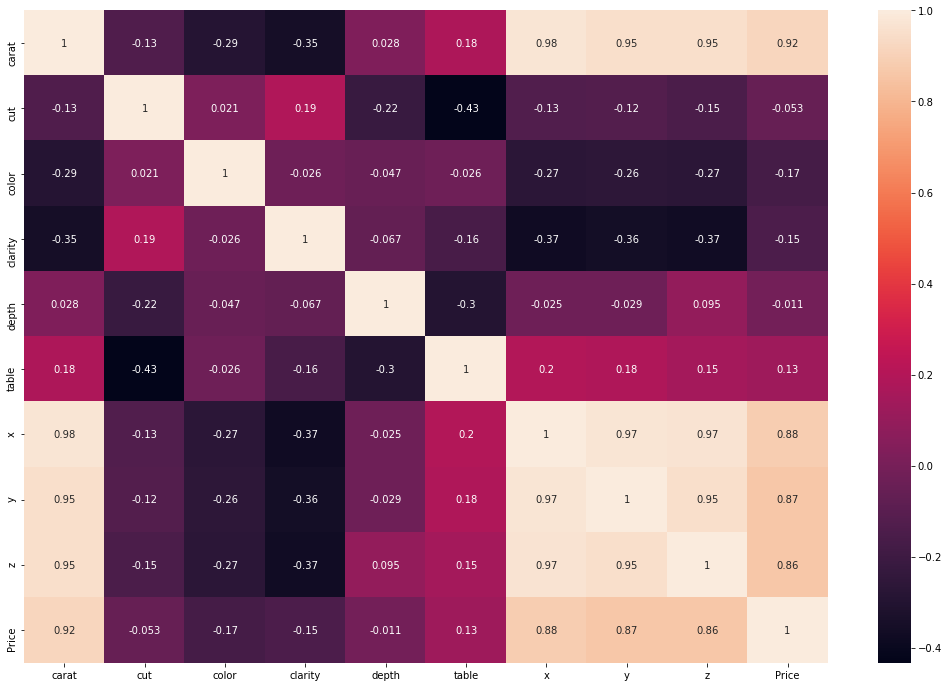

In [124]:
plt.figure(figsize=(18,12))
sns.heatmap(cormat,annot=True)

# Splitting data into train and split

In [126]:
x=df.drop('Price',axis=1)
y=df['Price']

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [129]:
r2=[]
mse=[]
mae=[]
features=[]
name=[]



def model(data,threshold):
    feat=[]
    values=[]
    for i,index in enumerate(data.index):
        if abs(data[index])>threshold:
            feat.append(index)
            values.append(data[index])
    df1=pd.DataFrame(data=values,index=feat,columns=['corr values'])
    df2=df[df1.index.values]
    
    
    
    x=df2.drop('Price',axis=1)
    y=df2['Price']
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.random.randint(1,100,1)[0])
    
    sc=StandardScaler().fit(x_train)
    x_train=sc.transform(x_train)
    x_test=sc.transform(x_test)
    
    feature=x.shape[1]
    
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    
    
    
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    features.append(feature)
    name.append(x.columns)
    
    
    df3=pd.DataFrame(data=[name,features,r2,mae,mse],index=['name','features','r2','mae','mse'])
    
    return df3
    
    
    
    

In [132]:
model(cormat['Price'],0.9).T
model(cormat['Price'],0.8).T
model(cormat['Price'],0.1).T
model(cormat['Price'],0.0).T


,name,features,r2,mae,mse
0,"Index(['carat'], dtype='object')",1,0.847152,1003.92,2.38341e+06
1,"Index(['carat', 'x', 'y', 'z'], dtype='object')",4,0.846653,916.562,2.43182e+06
2,"Index(['carat', 'color', 'clarity', 'table', '...",7,0.894426,808.186,1.65689e+06
3,"Index(['carat', 'cut', 'color', 'clarity', 'de...",9,0.910591,797.422,1.41093e+06


# RandomForestRegressor

In [134]:
r2=[]
mse=[]
mae=[]
features=[]
name=[]



def model(data,threshold):
    feat=[]
    values=[]
    for i,index in enumerate(data.index):
        if abs(data[index])>threshold:
            feat.append(index)
            values.append(data[index])
    df1=pd.DataFrame(data=values,index=feat,columns=['corr values'])
    df2=df[df1.index.values]
    
    
    
    x=df2.drop('Price',axis=1)
    y=df2['Price']
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=np.random.randint(1,100,1)[0])
    
    sc=StandardScaler().fit(x_train)
    x_train=sc.transform(x_train)
    x_test=sc.transform(x_test)
    
    feature=x.shape[1]
    
    lm=RandomForestRegressor()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    
    
    
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    features.append(feature)
    name.append(x.columns)
    
    
    df3=pd.DataFrame(data=[name,features,r2,mae,mse],index=['name','features','r2','mae','mse'])
    
    return df3
    
    
    
    

In [135]:
model(cormat['Price'],0.9).T
model(cormat['Price'],0.8).T
model(cormat['Price'],0.1).T
model(cormat['Price'],0.0).T

,name,features,r2,mae,mse
0,"Index(['carat'], dtype='object')",1,0.874781,800.037,1.93704e+06
1,"Index(['carat', 'x', 'y', 'z'], dtype='object')",4,0.869255,810.67,2.03875e+06
2,"Index(['carat', 'color', 'clarity', 'table', '...",7,0.979535,278.978,327591
3,"Index(['carat', 'cut', 'color', 'clarity', 'de...",9,0.981408,268.087,294137
